In [34]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np 

In [35]:
import requests
import io
URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/teachingratings.csv'
response = requests.get(URL)
if response.status_code == 200:
    ratings_url = io.BytesIO(response.content)
    print("File downloaded successfully.")
else:
    print(f"Failed to download file. Status code: {response.status_code}")


File downloaded successfully.


In [36]:
ratings_df = pd.read_csv(ratings_url)

In [37]:
ratings_df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
1,yes,36,female,more,0.289916,3.7,upper,yes,yes,86,125,1,0,1,1,0,1,1,1
2,yes,36,female,more,0.289916,3.6,upper,yes,yes,76,125,1,0,1,1,0,1,1,1
3,yes,36,female,more,0.289916,4.4,upper,yes,yes,77,123,1,1,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1


In [38]:
ratings_df.prof.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 23, 24, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 63, 64, 65, 66, 67, 68, 70, 71, 72, 73, 74, 75,
       76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92,
       93, 94, 22, 30, 40, 47, 61, 62, 69], dtype=int64)

In [39]:
ratings_df.prof.nunique()

94

In [40]:
ratings_df.describe()

,age,beauty,eval,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
count,463.000000,4.630000e+02,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000,463.000000
mean,48.365011,6.271140e-08,3.998272,36.624190,55.177106,45.434125,0.203024,0.138229,0.421166,0.058315,0.660907,0.939525,0.779698
std,9.802742,7.886477e-01,0.554866,45.018481,75.072800,27.508902,0.402685,0.345513,0.494280,0.234592,0.473913,0.238623,0.414899
min,29.000000,-1.450494e+00,2.100000,5.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,-6.562689e-01,3.600000,15.000000,19.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,48.000000,-6.801430e-02,4.000000,23.000000,29.000000,44.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,57.000000,5.456024e-01,4.400000,40.000000,60.000000,70.500000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,73.000000,1.970023e+00,5.000000,380.000000,581.000000,94.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
no_duplicates_ratings_df = ratings_df.drop_duplicates(subset =['prof'])
no_duplicates_ratings_df.head()

,minority,age,gender,credits,beauty,eval,division,native,tenure,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
0,yes,36,female,more,0.289916,4.3,upper,yes,yes,24,43,1,0,1,1,0,1,1,1
4,no,59,male,more,-0.737732,4.5,upper,yes,yes,17,20,2,0,0,0,0,1,1,1
7,no,51,male,more,-0.571984,3.7,upper,yes,yes,55,55,3,0,0,0,0,1,1,1
9,no,40,female,more,-0.677963,4.3,upper,yes,yes,40,46,4,0,0,1,0,1,1,1
17,no,31,female,more,1.509794,4.4,upper,yes,yes,42,48,5,0,0,1,0,1,1,1


In [42]:
no_duplicates_ratings_df.describe()

,age,beauty,eval,students,allstudents,prof,PrimaryLast,vismin,female,single_credit,upper_division,English_speaker,tenured_prof
count,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.00000,94.000000,94.000000,94.000000,94.000000,94.000000
mean,47.553191,0.088349,3.920213,36.436170,56.223404,47.500000,0.074468,0.12766,0.425532,0.021277,0.680851,0.925532,0.840426
std,10.256513,0.827506,0.527233,41.765232,73.429237,27.279418,0.263939,0.33550,0.497074,0.145079,0.468646,0.263939,0.368175
min,29.000000,-1.450494,2.200000,7.000000,11.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,-0.580686,3.525000,16.250000,21.000000,24.250000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,47.000000,-0.039794,4.000000,24.500000,34.000000,47.500000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,1.000000
75%,56.000000,0.704112,4.300000,44.750000,64.250000,70.750000,0.000000,0.00000,1.000000,0.000000,1.000000,1.000000,1.000000
max,73.000000,1.970023,4.900000,348.000000,574.000000,94.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


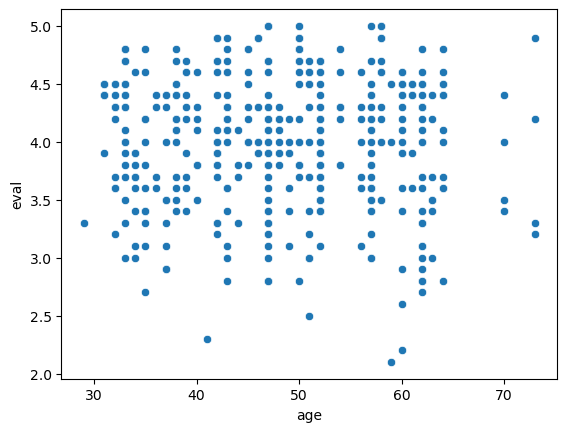

In [43]:
ax = sns.scatterplot(x='age', y='eval', data=ratings_df)
plt.show()

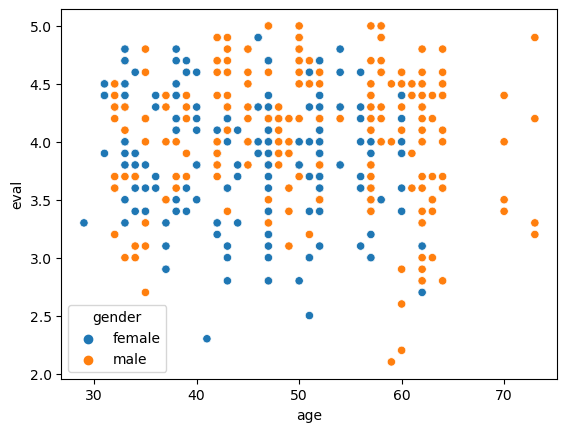

In [44]:
ax = sns.scatterplot(x='age', y='eval', hue='gender', data=ratings_df)
plt.show()

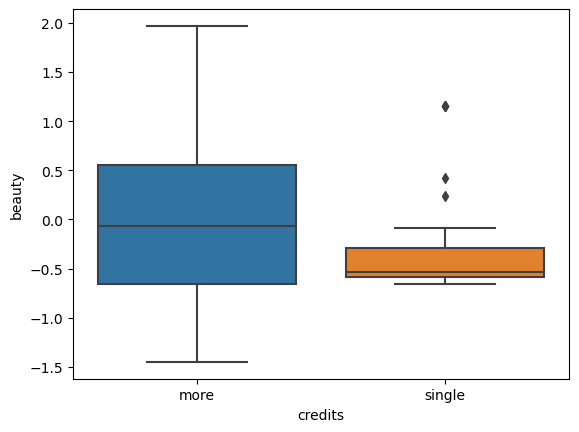

In [45]:
ax = sns.boxplot(x='credits', y='beauty', data=ratings_df)
plt.show()

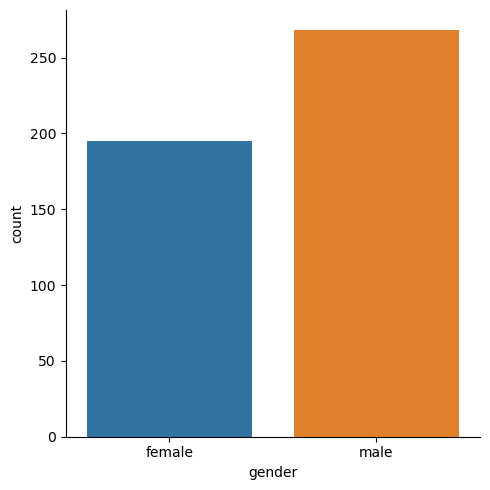

In [46]:
sns.catplot(x='gender', kind='count', data=ratings_df)
plt.show()

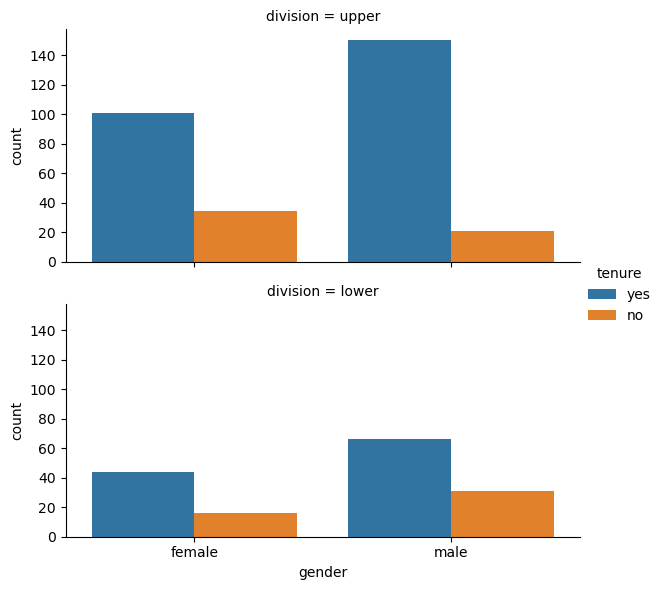

In [47]:
sns.catplot(x='gender', hue = 'tenure', row = 'division', kind='count', data=ratings_df, height = 3, aspect = 2)
plt.show()

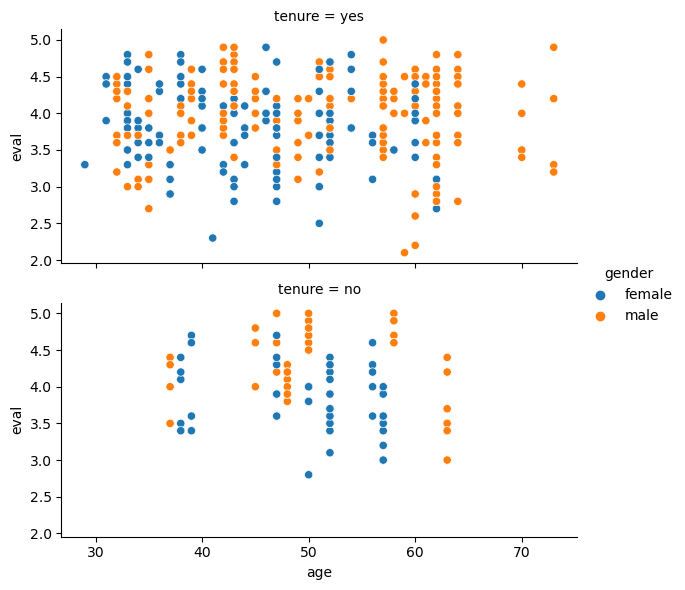

In [48]:
sns.relplot(x="age", y="eval", hue="gender", row="tenure", data=ratings_df, height = 3, aspect = 2)
plt.show()

C:\Users\Archita Dasgupta\AppData\Local\Temp\ipykernel_11988\4173415732.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(ratings_df['eval'], kde = True)
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


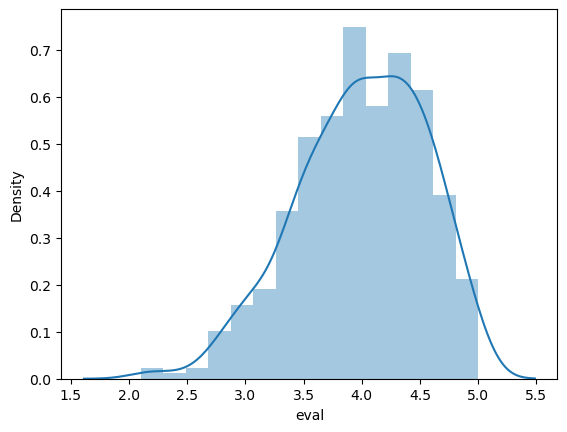

In [49]:
ax = sns.distplot(ratings_df['eval'], kde = True)
plt.show()

C:\Users\Archita Dasgupta\AppData\Local\Temp\ipykernel_11988\2913609762.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ratings_df[ratings_df['gender'] == 'female']['eval'], color='green', kde=True)
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Archita Dasgupta\AppData\Local\Temp\ipykernel_11988\2913609762.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

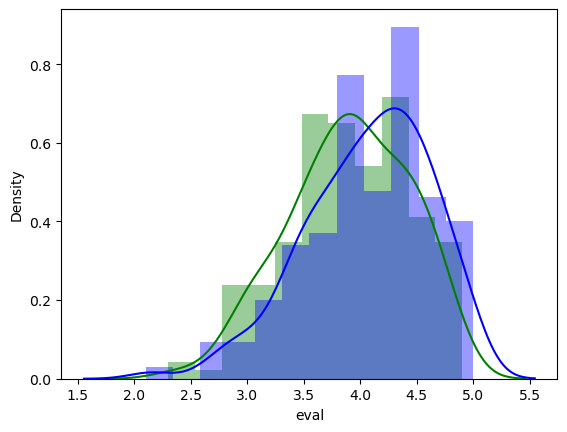

In [50]:
sns.distplot(ratings_df[ratings_df['gender'] == 'female']['eval'], color='green', kde=True) 
sns.distplot(ratings_df[ratings_df['gender'] == 'male']['eval'], color="blue", kde=True) 
plt.show()

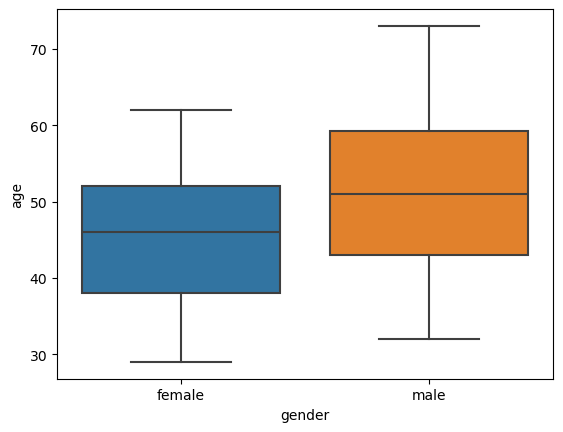

In [51]:
ax = sns.boxplot(x="gender", y="age", data=ratings_df)
plt.show()

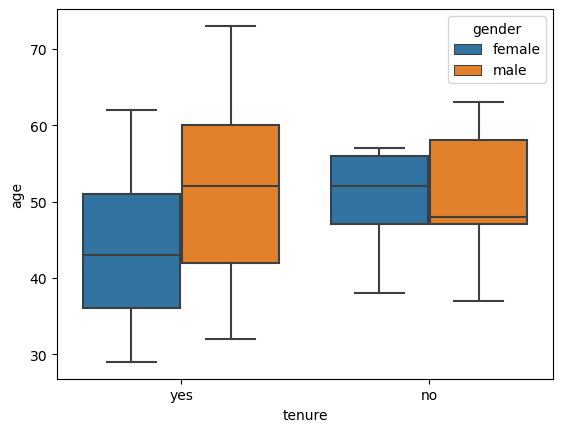

In [52]:
ax = sns.boxplot(x="tenure", y="age", hue="gender", data=ratings_df)
plt.show()

In [53]:
import scipy.stats
from math import sqrt

In [54]:
from scipy.stats import norm

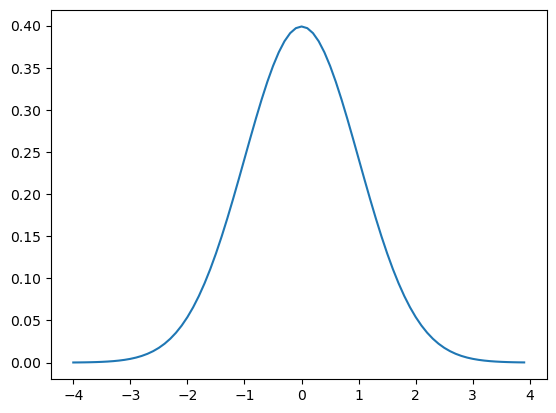

In [55]:
x_axis = np.arange(-4, 4, 0.1)
plt.plot(x_axis, norm.pdf(x_axis, 0, 1))
plt.show()

In [56]:
eval_mean = round(ratings_df['eval'].mean(), 3)
eval_sd = round(ratings_df['eval'].std(), 3)
print(eval_mean, eval_sd)

3.998 0.555


In [57]:
prob0 = scipy.stats.norm.cdf((4.5 - eval_mean)/eval_sd)
print(1 - prob0)

0.1828639734596742


In [58]:
#probability of receiving an evaluation score greater than 3.5 and less than 4.2

In [59]:
x1 = 3.5
prob1 = scipy.stats.norm.cdf((x1 - eval_mean)/eval_sd)
print(prob1)

0.1847801491443654


In [60]:
#Then for less than 4.2

In [61]:
x2 = 4.2
prob2 = scipy.stats.norm.cdf((x2 - eval_mean)/eval_sd)
print(prob2)

0.642057540461896


In [62]:
#The probability of a teacher receiving an evaluation score that is between 3.5 and 4.2 is

In [63]:
round((prob2 - prob1)*100, 1)

45.7

In [64]:
#Using the two-tailed test from a normal distribution

In [65]:
2*round(scipy.stats.norm.cdf((10.7 - 12)/(5.5/sqrt(36))), 3)

0.156

C:\Users\Archita Dasgupta\AppData\Local\Temp\ipykernel_11988\1328613908.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(ratings_df['eval'],
C:\Users\Archita Dasgupta\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

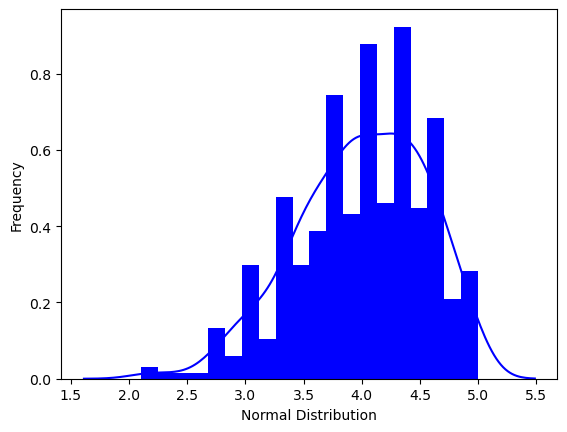

In [68]:
ax = sns.distplot(ratings_df['eval'],
                  bins=20,
                  kde=True,
                  color='blue',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')

In [69]:
scipy.stats.levene(ratings_df[ratings_df['gender'] == 'female']['eval'],
                   ratings_df[ratings_df['gender'] == 'male']['eval'], center='mean')


LeveneResult(statistic=0.19032922435292574, pvalue=0.6628469836244741)

In [70]:
scipy.stats.ttest_ind(ratings_df[ratings_df['gender'] == 'female']['eval'],
                   ratings_df[ratings_df['gender'] == 'male']['eval'], equal_var = True)

TtestResult(statistic=-3.249937943510772, pvalue=0.0012387609449522217, df=461.0)

In [71]:
ratings_df.loc[(ratings_df['age'] <= 40), 'age_group'] = '40 years and younger'
ratings_df.loc[(ratings_df['age'] > 40)&(ratings_df['age'] < 57), 'age_group'] = 'between 40 and 57 years'
ratings_df.loc[(ratings_df['age'] >= 57), 'age_group'] = '57 years and older'

In [72]:
scipy.stats.levene(ratings_df[ratings_df['age_group'] == '40 years and younger']['beauty'],
                   ratings_df[ratings_df['age_group'] == 'between 40 and 57 years']['beauty'], 
                   ratings_df[ratings_df['age_group'] == '57 years and older']['beauty'], 
                   center='mean')

LeveneResult(statistic=8.60005668392584, pvalue=0.000215366180993476)

In [73]:
forty_lower = ratings_df[ratings_df['age_group'] == '40 years and younger']['beauty']
forty_fiftyseven = ratings_df[ratings_df['age_group'] == 'between 40 and 57 years']['beauty']
fiftyseven_older = ratings_df[ratings_df['age_group'] == '57 years and older']['beauty']

In [74]:
f_statistic, p_value = scipy.stats.f_oneway(forty_lower, forty_fiftyseven, fiftyseven_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 17.597558611010122, P-Value: 4.3225489816137975e-08


In [75]:
scipy.stats.levene(ratings_df[ratings_df['age_group'] == '40 years and younger']['eval'],
                   ratings_df[ratings_df['age_group'] == 'between 40 and 57 years']['eval'], 
                   ratings_df[ratings_df['age_group'] == '57 years and older']['eval'], 
                   center='mean')


LeveneResult(statistic=3.820237661494229, pvalue=0.02262141852021939)

In [76]:
forty_lower_eval = ratings_df[ratings_df['age_group'] == '40 years and younger']['eval']
forty_fiftyseven_eval = ratings_df[ratings_df['age_group'] == 'between 40 and 57 years']['eval']
fiftyseven_older_eval = ratings_df[ratings_df['age_group'] == '57 years and older']['eval']

In [77]:
f_statistic, p_value = scipy.stats.f_oneway(forty_lower_eval, forty_fiftyseven_eval, fiftyseven_older_eval)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 1.2226327996572206, P-Value: 0.29540894225417536


In [78]:
cont_table  = pd.crosstab(ratings_df['tenure'], ratings_df['gender'])
cont_table

gender,female,male
tenure,,
no,50,52
yes,145,216


In [79]:
scipy.stats.chi2_contingency(cont_table, correction = False)

Chi2ContingencyResult(statistic=2.557051129789522, pvalue=0.10980322511302845, dof=1, expected_freq=array([[ 42.95896328,  59.04103672],
       [152.04103672, 208.95896328]]))

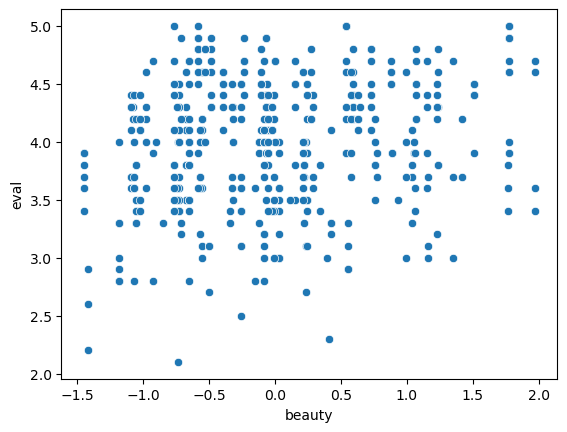

In [80]:
ax = sns.scatterplot(x="beauty", y="eval", data=ratings_df)

In [81]:
scipy.stats.pearsonr(ratings_df['beauty'], ratings_df['eval'])

PearsonRResult(statistic=0.1890390908404521, pvalue=4.247115419813754e-05)

In [82]:
import statsmodels.api as sm

In [83]:
X = ratings_df['female']
y = ratings_df['eval']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   eval   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     10.56
Date:                Wed, 10 Jul 2024   Prob (F-statistic):            0.00124
Time:                        19:56:29   Log-Likelihood:                -378.50
No. Observations:                 463   AIC:                             761.0
Df Residuals:                     461   BIC:                             769.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.0690      0.034    121.288      0.000       4.003       4.135
female        -0.1680      0.052     -3.250      0.001      -0.270      -0.066
==============================================================================
Omnibus:                       17.625   Durbin-Watson:                   1.209
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.970
Skew:                          -0.496   Prob(JB):                     7.60e-05
Kurtosis:                       2.981   Cond. No.                         2.47
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
ratings_df.loc[(ratings_df['age'] <= 40), 'age_group'] = '40 years and younger'
ratings_df.loc[(ratings_df['age'] > 40)&(ratings_df['age'] < 57), 'age_group'] = 'between 40 and 57 years'
ratings_df.loc[(ratings_df['age'] >= 57), 'age_group'] = '57 years and older'

In [85]:
from statsmodels.formula.api import ols
lm = ols('beauty ~ age_group', data = ratings_df).fit()
table= sm.stats.anova_lm(lm)
print(table)

              df      sum_sq    mean_sq          F        PR(>F)
age_group    2.0   20.422744  10.211372  17.597559  4.322549e-08
Residual   460.0  266.925153   0.580272        NaN           NaN


In [88]:
 X1 = pd.get_dummies(ratings_df[['age_group']])